# Traffic Sign Classifier

## Deep Learning

This notebook contains a classifier for the training and recognition of german traffic signs using tensorflow. Training data is provided via pickle files in the github repository. 

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data\\train.p'
validation_file= 'traffic-signs-data\\valid.p'
testing_file = 'traffic-signs-data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set 

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np


# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Here is how the training set is distributed across the 43 signs present in the dataset.


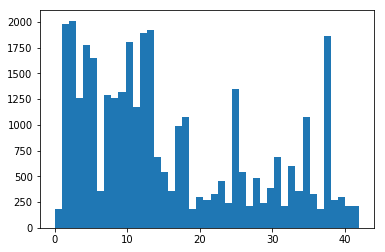

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv

#file = 'C:\\Users\\chrzanowski.dm\\Documents\\carnd\\p2\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv'
#signlist = open(file)

# Visualizations will be shown in the notebook.
%matplotlib inline

#plot a histogram of sign frequency in training set


plt.hist(y_train, bins = len(np.unique(y_train)))
print("Here is how the training set is distributed across the {} signs present in the dataset.".format(len(np.unique(y_train))))

#show an example image 
#index = random.randint(0,len(X_train))
#image = X_train[index]

#for row in csv.reader(signlist):
#    if str(y_train[index]) == row[0]:
#       signtype = row[1]

#print("Below is image with index {} from the training dataset.".format(index))
#print("It is an example of sign type with index {}, which corresponds with <{}>".format(y_train[index],signtype))
#plt.imshow(image)

#print(X_train[index].shape)


### Example of single image

Below is image with index 8705 from the training dataset.
It is an example of sign type with index 11, which corresponds with <Right-of-way at the next intersection>


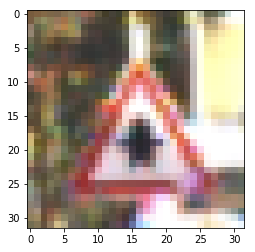

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv

file = 'C:\\Users\\chrzanowski.dm\\Documents\\carnd\\p2\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv'
signlist = open(file)

# Visualizations will be shown in the notebook.
%matplotlib inline


#plot a histogram of sign frequency in training set
#plt.hist(y_train, bins = len(np.unique(y_train)))

#show an example image 
index = random.randint(0,len(X_train))
image = X_train[index]

for row in csv.reader(signlist):
    if str(y_train[index]) == row[0]:
       signtype = row[1]


plt.imshow(image)
print("Below is image with index {} from the training dataset.".format(index))
print("It is an example of sign type with index {}, which corresponds with <{}>".format(y_train[index],signtype))
#print(X_train[index].shape)


----

## Step 2: Deep Learning Model Architecture

### Pre-process the Data Set (normalize pixel values around 0)

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#print(X_train[3,3,3,0])

X_train = X_train.astype(float)
X_valid = X_valid.astype(float)
X_test = X_test.astype(float)

for sign in range(len(X_train)):
        X_train[sign] = np.multiply(np.subtract(X_train[sign],128.),(1./128.))
        
for sig in range(len(X_valid)):
        X_valid[sig] = np.multiply(np.subtract(X_valid[sig],128.),(1./128.))
        
for si in range(len(X_test)):
        X_test[si] = np.multiply(np.subtract(X_test[si],128.),(1./128.))
        
#print(X_train[3,3,3,0])
print(X_train.dtype)

float64


### Define Model Architecture (based on LeNet-5)

In [6]:
#Setup TensorFlow
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128

In [7]:
from tensorflow.contrib.layers import flatten

def IlNet(x):

    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x!!!3!!!. Output = 28x28x!!!6!!!.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding='VALID') + conv1_b
    
        #print(size(conv1))
    
    #L1 Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    
    #L1 Pooling. Input = 28x28x6. Output = 14x14x6. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding='VALID') + conv2_b
    
    #L2 Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    
    #L2 Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Flatten. Input = 5X5X16. Output = 400. 
    fc2 = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(120))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b    
    
    #L3 Activation. 
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    #Layer 4: Fully Connected. Input = 120. Output = 84. 
    fc4_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(84))
    fc4 = tf.matmul(fc3, fc4_W) + fc4_b
    
    #L4 Activation
    fc4 = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4, keep_prob)
    
    #Layer 5: Fully Connected. Input = 84. Output = 43. 
    fc5_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc4, fc5_W) + fc5_b
    
    #return output
    return logits

### Train, Validate and Test the Model

#### Define Necessary Relatioships

In [8]:
#FEATURES AND LABELS
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

In [9]:
#TRAINING PIPELINE
rate = 0.001

logits = IlNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [10]:


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = IlNet(x)


#MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
#saver = tf.train.Saver(var_list=[conv1_W, conv1_b, conv2_W, conv2_b, fc3_W, fc3_b, fc4_W, fc4_b, fc5_W, fc5_b])

def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    

#### Train the model

In [25]:
#CODE TO TRAIN AND SAVE 
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './2ilnet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.588

EPOCH 2 ...
Validation Accuracy = 0.799

EPOCH 3 ...
Validation Accuracy = 0.858

EPOCH 4 ...
Validation Accuracy = 0.897

EPOCH 5 ...
Validation Accuracy = 0.923

EPOCH 6 ...
Validation Accuracy = 0.927

EPOCH 7 ...
Validation Accuracy = 0.932

EPOCH 8 ...
Validation Accuracy = 0.933

EPOCH 9 ...
Validation Accuracy = 0.934

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.942

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.945

EPOCH 16 ...
Validation Accuracy = 0.947

EPOCH 17 ...
Validation Accuracy = 0.949

EPOCH 18 ...
Validation Accuracy = 0.945

EPOCH 19 ...
Validation Accuracy = 0.951

EPOCH 20 ...
Validation Accuracy = 0.951

EPOCH 21 ...
Validation Accuracy = 0.952

EPOCH 22 ...
Validation Accuracy = 0.949

EPOCH 23 ...
Validation Accuracy = 0.952

EPOCH 24 ...
Validation Accura

#### Evaluate Model with validation and test sets

In [10]:

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = IlNet(x)


#MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
#saver = tf.train.Saver(var_list=[conv1_W, conv1_b, conv2_W, conv2_b, fc3_W, fc3_b, fc4_W, fc4_b, fc5_W, fc5_b])

def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

with tf.Session() as sess:
    
    saver.restore(sess,"./ilnet")
    tr_acc = evaluate(X_train, y_train)
    va_acc = evaluate(X_valid, y_valid)
    te_acc = evaluate(X_test, y_test)
  

    print("Model Training Set Accuracy is: {:.3f}".format(tr_acc))
    print("Model Validation Set Accuracy is: {:.3f}".format(va_acc))
    print("Model Test Set Accuracy is: {:.3f}".format(te_acc))

Model Training Set Accuracy is: 0.997
Model Validation Set Accuracy is: 0.955
Model Test Set Accuracy is: 0.939


---

## Step 3: Test a Model on New Images

Here 5 images of german traffic signs found using a google search are evaluated using the model - serving as a true generalization case (as previous validation and test sets were taken as a subset of the provided data). 

### Load and Output the Images

C:\Users\dchrz_000\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\dchrz_000\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\dchrz_000\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Users\dchrz_000\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\dchrz_000\Miniconda3\envs\

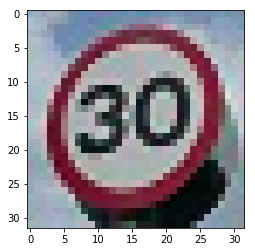

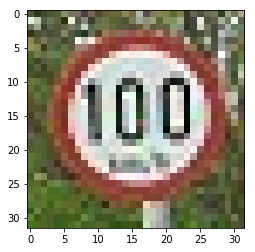

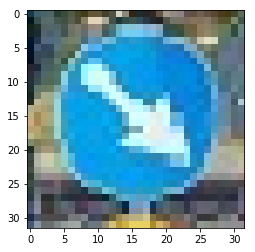

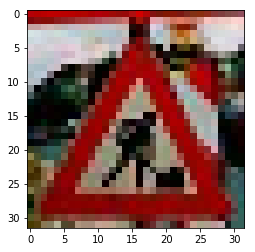

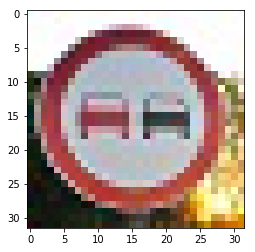

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread

im1 = imread('Test Images\\image_1_30kmhr.jpg')
im2 = imread('Test Images\\image_2_100kmhr.jpg')
im3 = imread('Test Images\\image_3_keepright.jpg')
im4 = imread('Test Images\\image_4_roadwork.jpg')
im5 = imread('Test Images\\image_5_nopass.jpg')

plt.imshow(im1)
plt.figure()
plt.imshow(im2)
plt.figure()
plt.imshow(im3)
plt.figure()
plt.imshow(im4)
plt.figure()
plt.imshow(im5)

### Predict the Sign Type for Each Image

#### Assemble 4D array from test images

In [10]:
#PREPROCESSING

#Combine 5 Images into 1 4D array
ima1 = np.expand_dims(im1, axis=0)
print(ima1.shape)
print(type(ima1))
ima2 = np.expand_dims(im2, axis=0)
print(ima2.shape)
print(type(ima2))
ima3 = np.expand_dims(im3, axis=0)
print(ima3.shape)
print(type(ima3))
ima4 = np.expand_dims(im4, axis=0)
print(ima4.shape)
print(type(ima4))
ima5 = np.expand_dims(im5, axis=0)
print(ima5.shape)
print(type(ima5))

test_ims = np.concatenate((ima1,ima2,ima3,ima4,ima5))
#print(test_ims.shape)

#Normalize Images Same as in Training Set
test_ims = test_ims.astype('float32')

for s in range(len(test_ims)):
        test_ims[s] = np.multiply(np.subtract(test_ims[s],128.),(1./128.))

#print(test_ims.dtype)


(1, 32, 32, 3)
<class 'numpy.ndarray'>
(1, 32, 32, 3)
<class 'numpy.ndarray'>
(1, 32, 32, 3)
<class 'numpy.ndarray'>
(1, 32, 32, 3)
<class 'numpy.ndarray'>
(1, 32, 32, 3)
<class 'numpy.ndarray'>
(5, 32, 32, 3)
float32


#### Run through the network, print sign index guess for each

In [13]:
#RUN THROUGH CONVNET
#x= tf.placeholder(tf.float32, (None, 32, 32, 3))
#keep_prob = tf.placeholder(tf.float32, (None))


t_logits = IlNet(x)
predictions = tf.argmax(t_logits,1)

saver = tf.train.Saver()

#tf.reset_default_graph()

with tf.Session() as sess:
    #tf.reset_default_graph()
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,"./ilnet")
    print("restore successful?")
    
    the_predictions = sess.run(
        predictions,
        feed_dict={x: test_ims, keep_prob: 1.0})
    
    the_logits = sess.run(
         t_logits,
         feed_dict={x: test_ims, keep_prob: 1.0})

print('Predictions: {}'.format(the_predictions))
#print('logits: {}'.format(the_logits))

restore successful?
Predictions: [10  1 38 11  9]
logits: [[ -1.78205986e+01  -1.96428990e+00  -3.47791433e+00  -1.42977543e+01
   -6.34646749e+00  -2.17418939e-01  -9.73890686e+00   1.91431224e+00
   -1.50439758e+01  -4.49575710e+00   3.15330625e+00   1.29767990e+00
   -4.50857401e-01  -1.39430990e+01  -1.91232777e+01  -1.81093216e+01
    3.52454513e-01  -2.14220695e+01  -1.85648956e+01   6.47161901e-01
   -1.43792219e+01  -5.97303104e+00  -3.35181198e+01  -6.22703648e+00
   -1.67158012e+01  -1.49101725e+01  -9.68803215e+00  -9.95097733e+00
   -1.00549440e+01  -1.92449684e+01  -1.10093184e+01  -1.14752378e+01
   -2.58990612e+01   2.85585856e+00  -2.33408585e+01  -7.12738514e+00
   -1.61845570e+01  -8.18820572e+00  -1.86262035e+01  -3.39957857e+00
   -1.18826520e+00  -1.41120796e+01  -2.70265961e+00]
 [ -3.94405985e+00   1.86254656e+00  -6.29676640e-01  -6.04879284e+00
    1.23787075e-02  -8.21258307e-01  -7.44729233e+00  -2.72751427e+00
   -5.79189396e+00  -6.39622164e+00  -7.88896608

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
Correct = [1, 7, 38, 25, 9]
count = 0
tot = len(Correct)

for a in range(len(Correct)):
        if Correct[a]==the_predictions[a]:
            count = count + 1

acc = count/tot

print("Accuracy is: {}".format(acc))

Accuracy is: 0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [18]:
    #softmaxit = np.array(zeros((5,43)))

#     for d in range len(logits)  
#         softmaxit[d] = tf.softmax(logits[d])

logits = tf.placeholder(tf.float32, (5, 43)) 

softmaxit = tf.nn.softmax(logits)
top5s = tf.nn.top_k(softmaxit, 5)


with tf.Session() as sess:
    
    #for d in range len(the_logits)  
        the_softmaxes = sess.run(
        top5s,
        feed_dict={logits: the_logits})
        
        
        print(the_softmaxes)
        


TopKV2(values=array([[  4.13552672e-01,   3.07150304e-01,   1.19796067e-01,
          6.46610186e-02,   3.37385312e-02],
       [  6.44980192e-01,   1.01397827e-01,   6.30280375e-02,
          5.33565283e-02,   4.40539308e-02],
       [  1.00000000e+00,   2.04585272e-11,   7.95276905e-16,
          1.82048927e-16,   5.37876758e-18],
       [  9.92605329e-01,   7.39357946e-03,   1.04575076e-06,
          5.42750334e-09,   5.05415754e-09],
       [  9.99803007e-01,   1.82657575e-04,   1.39321928e-05,
          3.59851441e-07,   1.47480761e-09]], dtype=float32), indices=array([[10, 33,  7, 11, 19],
       [ 1,  4, 19,  2,  5],
       [38, 34, 17, 33, 40],
       [11, 30, 21, 23, 27],
       [ 9, 16, 10, 12, 41]]))
